# BÀI THỰC HÀNH 2: MẠNG NEURAL TÍCH CHẬP

Tên: Trần Nhật Phương Anh  
MSSV: 23520078

<b>Hướng dẫn nộp bài:</b> Các bạn commit và push code lên github, sử dụng file txt đặt tên theo cú pháp <MSSV>.txt chứa đường link dẫn đến github của bài thực hành và nộp file txt này tên courses..

Bộ dữ liệu sử dụng: [VinaFood21 dataset](https://arxiv.org/abs/2108.02929).

Link download: https://drive.google.com/file/d/1UpZOf0XlwvB4rKpyZ35iwTA8oWHqDBbR/view?usp=share_link.

In [30]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D, Flatten, Dense, Input, concatenate, Add, Activation, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

In [2]:
train_generator = ImageDataGenerator(rescale = 1./255).flow_from_directory('VinaFood21/train', target_size = (28, 28), batch_size = 32, class_mode = 'categorical')
test_generator = ImageDataGenerator(rescale = 1./255).flow_from_directory('VinaFood21/test', target_size = (28, 28), batch_size = 32, class_mode = 'categorical')

Found 10044 images belonging to 21 classes.
Found 6682 images belonging to 21 classes.


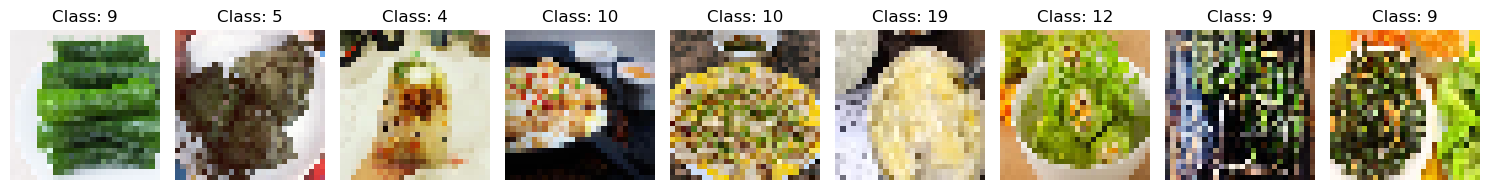

In [3]:
images, labels = next(train_generator)

plt.figure(figsize=(15, 5)) 

for i in range(9):
    plt.subplot(1, 9, i + 1)  
    plt.imshow(images[i])
    plt.axis('off')  
    plt.title(f"Class: {np.argmax(labels[i])}")  

plt.tight_layout()
plt.show()


### Bài 1: Xây dựng mô hình LeNet. Huấn luyện và đánh giá mô hình LeNet trên 4 độ đo precision, recall và F1-macro (sử dụng Adam làm optimizer).

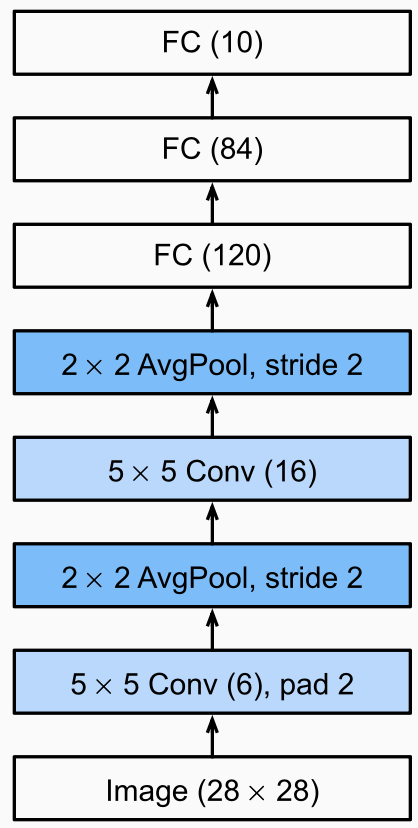

In [4]:
lenet = Sequential(
    [   
        Conv2D(6, kernel_size = (5, 5), padding = 'same', activation = 'relu', input_shape = (28, 28, 3)),
        AveragePooling2D(pool_size = (2, 2), strides = 2),
        Conv2D(16, kernel_size = (5, 5), activation = 'relu', padding = 'valid'),
        AveragePooling2D(pool_size = (2, 2), strides = 2),
        Flatten(),
        Dense(120, activation = 'relu'),
        Dense(84, activation = 'relu'),
        Dense(21, activation = 'softmax')
    ]
)

c:\Anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
lenet.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 21)             │         1,785 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,941 (245.86 KB)

 Trainable params: 62,941 (245.86 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
lenet.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [7]:
lenet.fit(train_generator, epochs = 10, validation_data = test_generator)

c:\Anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
133/314 ━━━━━━━━━━━━━━━━━━━━ 3:10 1s/step - accuracy: 0.0814 - loss: 2.9955

c:\Anaconda3\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


314/314 ━━━━━━━━━━━━━━━━━━━━ 584s 2s/step - accuracy: 0.1159 - loss: 2.9005 - val_accuracy: 0.1366 - val_loss: 2.8181
Epoch 2/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 493s 2s/step - accuracy: 0.1773 - loss: 2.7168 - val_accuracy: 0.1838 - val_loss: 2.6789
Epoch 3/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 441s 1s/step - accuracy: 0.2040 - loss: 2.6253 - val_accuracy: 0.1893 - val_loss: 2.6497
Epoch 4/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 300s 957ms/step - accuracy: 0.2271 - loss: 2.5388 - val_accuracy: 0.2260 - val_loss: 2.5562
Epoch 5/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 302s 962ms/step - accuracy: 0.2590 - loss: 2.4180 - val_accuracy: 0.2342 - val_loss: 2.5050
Epoch 6/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 296s 942ms/step - accuracy: 0.2853 - loss: 2.3083 - val_accuracy: 0.2345 - val_loss: 2.5316
Epoch 7/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 298s 951ms/step - accuracy: 0.3101 - loss: 2.2443 - val_accuracy: 0.2606 - val_loss: 2.4189
Epoch 8/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 304s 969ms/step - accuracy: 0.3291 - loss: 2.1602 - val_

In [8]:
lenet.evaluate(test_generator)

209/209 ━━━━━━━━━━━━━━━━━━━━ 122s 584ms/step - accuracy: 0.2677 - loss: 2.4279


[2.4279019832611084, 0.26773419976234436]

In [9]:
y_pred = lenet.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())
report = classification_report(y_true, y_pred_classes, target_names = class_labels)

209/209 ━━━━━━━━━━━━━━━━━━━━ 122s 580ms/step


In [10]:
print("Classification Report:\n", report)

Classification Report:
                   precision    recall  f1-score   support

        banh-can       0.04      0.01      0.01       241
        banh-hoi       0.11      0.17      0.13       607
    banh-mi-chao       0.05      0.06      0.05       289
        banh-tet       0.05      0.03      0.04       364
 banh-trang-tron       0.03      0.02      0.02       309
          banh-u       0.03      0.01      0.02       176
        banh-uot       0.07      0.07      0.07       560
       bap-nuong       0.00      0.00      0.00       143
          bo-kho       0.07      0.05      0.06       338
       bo-la-lot       0.08      0.12      0.09       458
       bot-chien       0.03      0.03      0.03       276
           ca-ri       0.03      0.10      0.05       171
    canh-kho-qua       0.04      0.08      0.05       290
   canh-khoai-mo       0.03      0.03      0.03       198
        ga-nuong       0.05      0.05      0.05       372
          goi-ga       0.06      0.06      0.06

In [11]:
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average = 'weighted')
recall = recall_score(y_true, y_pred_classes, average = 'weighted')
f1 = f1_score(y_true, y_pred_classes, average = 'macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.0591
Precision: 0.0569
Recall: 0.0591
F1 Score: 0.0540


### Bài 2: Xây dựng mô hình GoogLeNet. Huấn luyện và đánh giá mô hình GoogLeNet trên 4 độ đo precision, recall và F1 (sử dụng Adam làm optimizer).

**Inception Blocks**

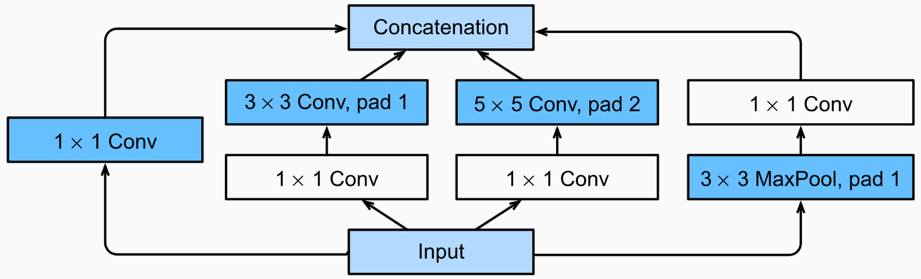

**GoogLeNet (Multi-branch Network)**

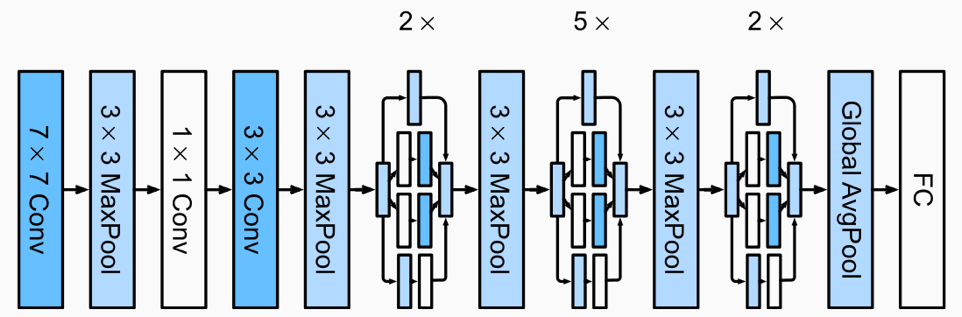

In [12]:
train_generator = ImageDataGenerator(rescale = 1./255).flow_from_directory('VinaFood21/train', target_size = (224, 224), batch_size = 32, class_mode = 'categorical')
test_generator = ImageDataGenerator(rescale = 1./255).flow_from_directory('VinaFood21/test', target_size = (224, 224), batch_size = 32, class_mode = 'categorical')

Found 10044 images belonging to 21 classes.
Found 6682 images belonging to 21 classes.


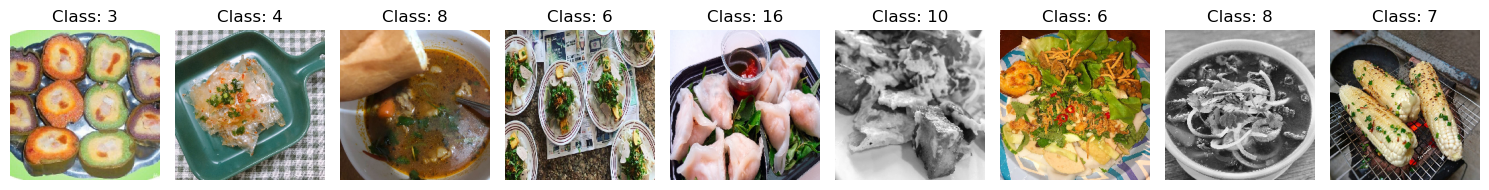

In [13]:
images, labels = next(train_generator)

plt.figure(figsize=(15, 5)) 

for i in range(9):
    plt.subplot(1, 9, i + 1)  
    plt.imshow(images[i])
    plt.axis('off')  
    plt.title(f"Class: {np.argmax(labels[i])}")  

plt.tight_layout()
plt.show()

In [14]:
def inception_block(x, filters):
    f1, f3r, f3, f5r, f5, fp = filters
    
    # Nhánh 1: Conv 1x1
    branch1 = Conv2D(f1, kernel_size = (1, 1), padding = 'same', activation = 'relu')(x)
    
    # Nhánh 2: Conv 1x1 -> Conv 3x3
    branch2 = Conv2D(f3r, kernel_size = (1, 1), padding = 'same', activation = 'relu')(x)
    branch2 = Conv2D(f3, kernel_size = (3, 3), padding = 'same', activation = 'relu')(branch2)
    
    # Nhánh 3: Conv 1x1 -> Conv 5x5
    branch3 = Conv2D(f5r, kernel_size = (1, 1), padding = 'same', activation = 'relu')(x)
    branch3 = Conv2D(f5, kernel_size = (5, 5), padding = 'same', activation = 'relu')(branch3)
    
    # Nhánh 4: MaxPooling -> Conv 1x1
    branch4 = MaxPooling2D(pool_size = (3, 3), strides = (1, 1), padding = 'same')(x)
    branch4 = Conv2D(fp, kernel_size = (1, 1), padding = 'same', activation = 'relu')(branch4)
    
    # Kết hợp các nhánh
    output = concatenate([branch1, branch2, branch3, branch4], axis = -1)
    
    return output

In [15]:
def googlenet(input_shape, output):
    inp = Input(shape = input_shape)
    
    x = Conv2D(64, kernel_size = (7, 7), strides = (2, 2), padding = 'same', activation = 'relu')(inp)
    x = MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'same')(x)
    x = Conv2D(64, kernel_size = (1, 1), padding = 'same', activation = 'relu')(x)
    x = Conv2D(192, kernel_size = (3, 3), padding = 'same', activation = 'relu')(x)
    x = MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'same')(x)
    
    x = inception_block(x, filters = (64, 96, 128, 16, 32, 32))
    x = inception_block(x, filters = (128, 128, 192, 32, 96, 64))
    
    x = MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'same')(x)
    
    x = inception_block(x, filters = (192, 96, 208, 16, 48, 64))
    x = inception_block(x, filters = (160, 112, 224, 24, 64, 64))
    x = inception_block(x, filters = (128, 128, 256, 24, 64, 64))
    x = inception_block(x, filters = (112, 144, 288, 32, 64, 64))
    x = inception_block(x, filters = (256, 160, 320, 32, 128, 128))
    
    x = MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'same')(x)
    
    x = inception_block(x, filters = (256, 160, 320, 32, 128, 128))
    x = inception_block(x, filters = (384, 192, 384, 48, 128, 128))
    
    x = GlobalAveragePooling2D()(x)
    
    out = Dense(output, activation = 'softmax')(x)
    
    model = Model(inputs = inp, outputs = out)
    return model

In [19]:
GoogLenet = googlenet((224, 224, 3), 21)
GoogLenet.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_59 (Conv2D)  │ (None, 112, 112,  │      9,472 │ input_layer_2[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_13    │ (None, 56, 56,    │          0 │ conv2d_59[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_60 (Conv2D)  │ (None, 56, 56,    │      4,160 │ max_pooling2d_13… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_61 (Conv2D)  │ (None, 56, 56,    │    110,784 │ conv2d_60[0][0]   │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_14    │ (None, 28, 28,    │          0 │ conv2d_61[0][0]   │
│ (MaxPooling2D)      │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_63 (Conv2D)  │ (None, 28, 28,    │     18,528 │ max_pooling2d_14… │
│                     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_65 (Conv2D)  │ (None, 28, 28,    │      3,088 │ max_pooling2d_14… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_15    │ (None, 28, 28,    │          0 │ max_pooling2d_14… │
│ (MaxPooling2D)      │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_62 (Conv2D)  │ (None, 28, 28,    │     12,352 │ max_pooling2d_14… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_64 (Conv2D)  │ (None, 28, 28,    │    110,720 │ conv2d_63[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_66 (Conv2D)  │ (None, 28, 28,    │     12,832 │ conv2d_65[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_67 (Conv2D)  │ (None, 28, 28,    │      6,176 │ max_pooling2d_15… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_9       │ (None, 28, 28,    │          0 │ conv2d_62[0][0],  │
│ (Concatenate)       │ 256)              │            │ conv2d_64[0][0],  │
│                     │                   │            │ conv2d_66[0][0],  │
│                     │                   │            │ conv2d_67[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_69 (Conv2D)  │ (None, 28, 28,    │     32,896 │ concatenate_9[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_71 (Conv2D)  │ (None, 28, 28,    │      8,224 │ concatenate_9[0]… │
│                     │ 32)               │            │                 

 Total params: 5,995,077 (22.87 MB)

 Trainable params: 5,995,077 (22.87 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
GoogLenet.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [21]:
GoogLenet.fit(train_generator, epochs = 10, validation_data = test_generator)

Epoch 1/10
260/314 ━━━━━━━━━━━━━━━━━━━━ 2:11 2s/step - accuracy: 0.0871 - loss: 3.0136

c:\Anaconda3\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


314/314 ━━━━━━━━━━━━━━━━━━━━ 1023s 3s/step - accuracy: 0.0863 - loss: 2.9903 - val_accuracy: 0.0908 - val_loss: 2.9797
Epoch 2/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 994s 3s/step - accuracy: 0.0893 - loss: 2.9799 - val_accuracy: 0.0908 - val_loss: 2.9779
Epoch 3/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 988s 3s/step - accuracy: 0.0902 - loss: 2.9790 - val_accuracy: 0.0838 - val_loss: 2.9752
Epoch 4/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 990s 3s/step - accuracy: 0.0893 - loss: 2.9777 - val_accuracy: 0.0908 - val_loss: 2.9759
Epoch 5/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1001s 3s/step - accuracy: 0.0895 - loss: 2.9786 - val_accuracy: 0.0908 - val_loss: 2.9770
Epoch 6/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 984s 3s/step - accuracy: 0.0902 - loss: 2.9775 - val_accuracy: 0.0908 - val_loss: 2.9760
Epoch 7/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 988s 3s/step - accuracy: 0.0906 - loss: 2.9772 - val_accuracy: 0.0908 - val_loss: 2.9763
Epoch 8/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1043s 3s/step - accuracy: 0.0906 - loss: 2.9772 - val_accuracy: 0.

In [22]:
GoogLenet.evaluate(test_generator)

209/209 ━━━━━━━━━━━━━━━━━━━━ 278s 1s/step - accuracy: 0.0908 - loss: 2.9747


[2.9747304916381836, 0.09084106236696243]

In [23]:
y_pred_gn = GoogLenet.predict(test_generator)
y_pred_classes_gn = np.argmax(y_pred_gn, axis = 1)
y_true_gn = test_generator.classes
report_gn = classification_report(y_true_gn, y_pred_classes_gn, target_names = class_labels)
print("Classification Report for GoogLeNet:\n", report_gn)

209/209 ━━━━━━━━━━━━━━━━━━━━ 256s 1s/step
Classification Report for GoogLeNet:
                   precision    recall  f1-score   support

        banh-can       0.00      0.00      0.00       241
        banh-hoi       0.09      1.00      0.17       607
    banh-mi-chao       0.00      0.00      0.00       289
        banh-tet       0.00      0.00      0.00       364
 banh-trang-tron       0.00      0.00      0.00       309
          banh-u       0.00      0.00      0.00       176
        banh-uot       0.00      0.00      0.00       560
       bap-nuong       0.00      0.00      0.00       143
          bo-kho       0.00      0.00      0.00       338
       bo-la-lot       0.00      0.00      0.00       458
       bot-chien       0.00      0.00      0.00       276
           ca-ri       0.00      0.00      0.00       171
    canh-kho-qua       0.00      0.00      0.00       290
   canh-khoai-mo       0.00      0.00      0.00       198
        ga-nuong       0.00      0.00      0.00  

c:\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [24]:
accuracy_gn = accuracy_score(y_true_gn, y_pred_classes_gn)
precision_gn = precision_score(y_true_gn, y_pred_classes_gn, average = 'weighted')
recall_gn = recall_score(y_true_gn, y_pred_classes_gn, average = 'weighted')
f1_gn = f1_score(y_true_gn, y_pred_classes_gn, average = 'macro')

print(f"GoogLeNet Accuracy: {accuracy_gn:.4f}")
print(f"GoogLeNet Precision: {precision_gn:.4f}")
print(f"GoogLeNet Recall: {recall_gn:.4f}")
print(f"GoogLeNet F1 Score: {f1_gn:.4f}")

GoogLeNet Accuracy: 0.0908
GoogLeNet Precision: 0.0083
GoogLeNet Recall: 0.0908
GoogLeNet F1 Score: 0.0151


c:\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


### Bài 3*: Xây dựng mô hình ResNet-18, đánh giá mô hình ResNet-18 trên bộ dữ liệu VinaFood21 sử dụng các độ đo precision, recall, và F1 (Sử dụng Adam làm optimizer).

**ResNet Block**

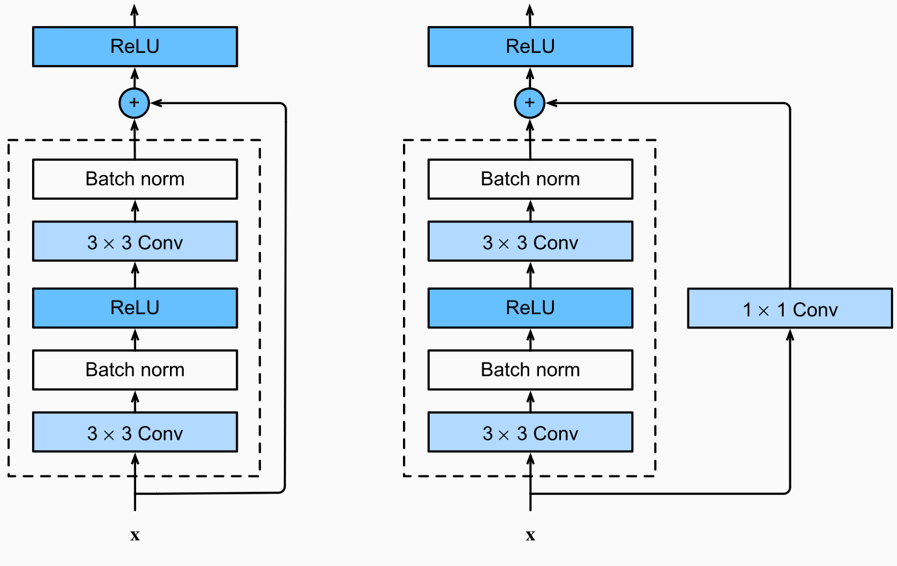

**ResNet**

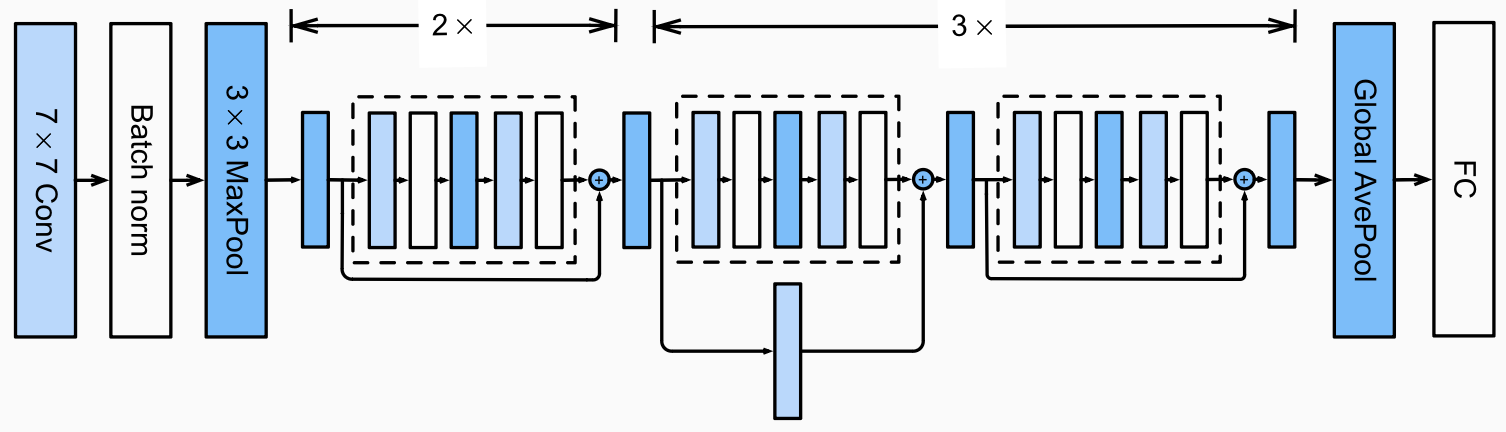

In [25]:
def residual_block(x, filters, stride = 1):
    shortcut = x
    
    # Nhánh chính
    x = Conv2D(filters, kernel_size = (3, 3), strides = stride, padding = 'same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters, kernel_size = (3, 3), padding = 'same')(x)
    x = BatchNormalization()(x)
    
    if stride != 1 or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, kernel_size = (1, 1), strides = stride, padding = 'same')(shortcut)
        shortcut = BatchNormalization()(shortcut)
        
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

In [26]:
def resnet_model(input_shape, output):
    inp = Input(shape= input_shape)

    x = Conv2D(64, kernel_size=(7, 7), strides=(2, 2), padding='same')(inp)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)

    
    x = residual_block(x, 64)
    x = residual_block(x, 64)
    
    x = residual_block(x, 128, stride=2)
    x = residual_block(x, 128)
    x = residual_block(x, 128, stride=2)
    x = residual_block(x, 128)
    x = residual_block(x, 128, stride=2)
    x = residual_block(x, 128)

    
    x = GlobalAveragePooling2D()(x)
    out = Dense(output, activation='softmax')(x)

    model = Model(inputs=inp, outputs=out)
    return model


In [27]:
resnet = resnet_model((224, 224, 3), 21)
resnet.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_116 (Conv2D) │ (None, 112, 112,  │      9,472 │ input_layer_3[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 112, 112,  │        256 │ conv2d_116[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 112, 112,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_26    │ (None, 56, 56,    │          0 │ activation[0][0]  │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_117 (Conv2D) │ (None, 56, 56,    │     36,928 │ max_pooling2d_26… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_117[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 56, 56,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_118 (Conv2D) │ (None, 56, 56,    │     36,928 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_118[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 56, 56,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │ max_pooling2d_26… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 56, 56,    │          0 │ add[0][0]         │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_119 (Conv2D) │ (None, 56, 56,    │     36,928 │ activation_2[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_119[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 56, 56,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_120 (Conv2D) │ (None, 56, 56,    │     36,928 │ activation_3[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_120[0][0]

 Total params: 1,907,477 (7.28 MB)

 Trainable params: 1,902,997 (7.26 MB)

 Non-trainable params: 4,480 (17.50 KB)

In [28]:
resnet.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [31]:
early_stop = EarlyStopping(
    monitor='val_loss',    
    patience=3,            
    restore_best_weights=True 
)

In [32]:
resnet.fit(train_generator, epochs = 10, validation_data = test_generator, callbacks=[early_stop])

Epoch 1/10
299/314 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.1906 - loss: 2.7216

c:\Anaconda3\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


314/314 ━━━━━━━━━━━━━━━━━━━━ 1046s 3s/step - accuracy: 0.2323 - loss: 2.5289 - val_accuracy: 0.0771 - val_loss: 3.6524
Epoch 2/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1045s 3s/step - accuracy: 0.3203 - loss: 2.1972 - val_accuracy: 0.1908 - val_loss: 3.1723
Epoch 3/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1005s 3s/step - accuracy: 0.3738 - loss: 2.0132 - val_accuracy: 0.2453 - val_loss: 2.8300
Epoch 4/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 994s 3s/step - accuracy: 0.4211 - loss: 1.8677 - val_accuracy: 0.2571 - val_loss: 2.8794
Epoch 5/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 986s 3s/step - accuracy: 0.4580 - loss: 1.7269 - val_accuracy: 0.3515 - val_loss: 2.2403
Epoch 6/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1001s 3s/step - accuracy: 0.5051 - loss: 1.5708 - val_accuracy: 0.3222 - val_loss: 2.4443
Epoch 7/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1142s 4s/step - accuracy: 0.5361 - loss: 1.4726 - val_accuracy: 0.3750 - val_loss: 2.1473
Epoch 8/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1245s 4s/step - accuracy: 0.5763 - loss: 1.3360 - val_accuracy:

In [33]:
resnet.evaluate(test_generator)

209/209 ━━━━━━━━━━━━━━━━━━━━ 248s 1s/step - accuracy: 0.3750 - loss: 2.1473


[2.1472911834716797, 0.37503740191459656]

In [34]:
y_pred_resnet = resnet.predict(test_generator)
y_pred_classes_resnet = np.argmax(y_pred_resnet, axis = 1)
y_true_resnet = test_generator.classes
report_resnet = classification_report(y_true_resnet, y_pred_classes_resnet, target_names = class_labels)
print("Classification Report for ResNet:\n", report_resnet)

209/209 ━━━━━━━━━━━━━━━━━━━━ 243s 1s/step
Classification Report for ResNet:
                   precision    recall  f1-score   support

        banh-can       0.04      0.04      0.04       241
        banh-hoi       0.10      0.09      0.10       607
    banh-mi-chao       0.02      0.03      0.03       289
        banh-tet       0.05      0.08      0.06       364
 banh-trang-tron       0.02      0.01      0.01       309
          banh-u       0.04      0.07      0.05       176
        banh-uot       0.10      0.06      0.08       560
       bap-nuong       0.02      0.01      0.02       143
          bo-kho       0.04      0.04      0.04       338
       bo-la-lot       0.07      0.08      0.08       458
       bot-chien       0.03      0.01      0.02       276
           ca-ri       0.05      0.04      0.04       171
    canh-kho-qua       0.04      0.03      0.03       290
   canh-khoai-mo       0.05      0.05      0.05       198
        ga-nuong       0.06      0.05      0.05     

In [35]:
accuracy_resnet = accuracy_score(y_true_resnet, y_pred_classes_resnet)
precision_resnet = precision_score(y_true_resnet, y_pred_classes_resnet, average = 'weighted')
recall_resnet = recall_score(y_true_resnet, y_pred_classes_resnet, average = 'weighted')
f1_resnet = f1_score(y_true_resnet, y_pred_classes_resnet, average = 'macro')

print(f"ResNet Accuracy: {accuracy_resnet:.4f}")
print(f"ResNet Precision: {precision_resnet:.4f}")
print(f"ResNet Recall: {recall_resnet:.4f}")
print(f"ResNet F1 Score: {f1_resnet:.4f}")

ResNet Accuracy: 0.0513
ResNet Precision: 0.0534
ResNet Recall: 0.0513
ResNet F1 Score: 0.0445


### Bài 4*: Sử dụng pretrained ResNet50 từ HuggingFace để fine-tune trên bộ dữ liệu VinaFood21.

In [37]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(weights = 'imagenet', input_shape = (224, 224, 3), classes = 21, include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(21, activation='softmax')(x)

resnet50 = Model(inputs=base_model.input, outputs=output)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


In [38]:
resnet50.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_4[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,852,693 (90.99 MB)

 Trainable params: 23,799,573 (90.79 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [43]:
resnet50.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
early_stop = EarlyStopping(
    monitor='val_loss',    
    patience=3,             
    restore_best_weights=True 
)

In [45]:
resnet50.fit(train_generator, epochs=1, validation_data=test_generator, callbacks=[early_stop])

 53/314 ━━━━━━━━━━━━━━━━━━━━ 36:38 8s/step - accuracy: 0.1325 - loss: 3.0439

In [ ]:
resnet50.evaluate(test_generator)

In [ ]:
y_pred_resnet50 = resnet50.predict(test_generator)
y_pred_classes_resnet50 = np.argmax(y_pred_resnet50, axis=1)
y_true_resnet50 = test_generator.classes
report_resnet50 = classification_report(y_true_resnet50, y_pred_classes_resnet50, target_names=class_labels)
print("Classification Report for ResNet50:\n", report_resnet50)

In [ ]:
accuracy_resnet50 = accuracy_score(y_true_resnet50, y_pred_classes_resnet50)
precision_resnet50 = precision_score(y_true_resnet50, y_pred_classes_resnet50, average='weighted')
recall_resnet50 = recall_score(y_true_resnet50, y_pred_classes_resnet50, average='weighted')
f1_resnet50 = f1_score(y_true_resnet50, y_pred_classes_resnet50, average='macro')

print(f"ResNet50 Accuracy: {accuracy_resnet50:.4f}")
print(f"ResNet50 Precision: {precision_resnet50:.4f}")
print(f"ResNet50 Recall: {recall_resnet50:.4f}")
print(f"ResNet50 F1 Score: {f1_resnet50:.4f}")